# 1. A gaussian integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)

Our p(x) is:
$$2 \cdot \left| \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right) \right| $$

since it integrates to 1 from $0$ to $\infty$, being a Gaussian centered on 0. 
Our integral then becomes:


$$ 0.5 \cdot \sqrt{2\pi}\sigma \cdot \int_0^\infty x^3 \frac{2}{\sigma \sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

MC integration result: 1327.2288892405106 	 Theoretical value: 1250


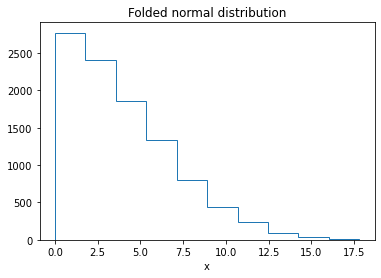

In [1]:
import numpy as np
import random as r
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm

#increasing the value of samples increses our precision
sample_n = 10000

mean = 0
sigma = 5

#sampling the gaussian distribution but taking only positive values
xi = np.absolute(np.random.normal (mean, sigma, sample_n))

#printing our sample values: it's half a gaussian!
plt.hist(xi, histtype='step')
plt.xlabel('x')
plt.title('Folded normal distribution')

def cube(x):
    return np.power(x, 3)

#multiplying our results by the normalization
integral = (np.sqrt(2 * np.pi) * sigma) * np.mean(cube(xi)) * 0.5

#the theoretical value
theor_integral = 2 * np.power(sigma, 4)
print('MC integration result:', integral, "\t Theoretical value:", theor_integral)


Now we can do it changing the number of samples to see how the result changes depending on $N$.

Text(0, 0.5, 'integral value')

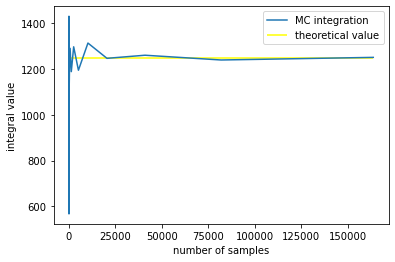

In [2]:
#doing it again but changing sample_n
sample_n = 10

#number of time we increase sample_n
runs_n = 15

def MC_integration (sample, mean, sigma):
    x = np.absolute(np.random.normal (mean, sigma, sample))
    return (np.sqrt(2 * np.pi) * sigma) * np.mean(cube(x)) * 0.5

int_results = np.empty(runs_n)
samples = []

for i in range(runs_n):
    samples.append (sample_n * np.power(2, i))    
    int_results[i] = MC_integration (samples[i], mean, sigma)
    
plt.plot(samples, int_results, label = 'MC integration')
plt.hlines(2 * np.power(sigma, 4), 0, samples[runs_n - 1], 'yellow', label = 'theoretical value')
plt.legend()
plt.xlabel('number of samples')
plt.ylabel('integral value')


As expected, **the results converges if $N$ is large.** Let us now study the distribution of the results if N is fixed.

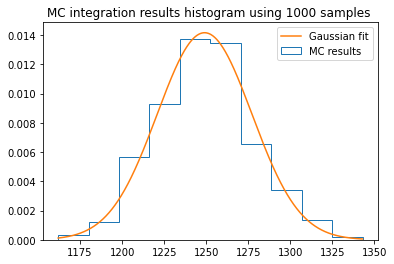

In [16]:
sample_n = 10000 #number of samples for each run
results_n = 1000 #number of integration results, plotted in the histogram

N_results = np.empty(results_n)

for i in range(results_n):
    N_results[i] = MC_integration(sample_n, mean, sigma)

n, bins, patches = plt.hist(N_results, histtype = 'step', density= True, label = "MC results")

(mean_int, sigma_int) = norm.fit(N_results)
y= np.linspace (N_results.min(), N_results.max(), 1000)
plt.plot(y, norm.pdf(y, mean_int, sigma_int), label ="Gaussian fit")
plt.title("MC integration results histogram using " + str(results_n) + " samples ")
plt.legend()

Finally, let us draw different histograms based on $N$. We expect the distribution to approach a Gaussian one if $N$ is large.

Text(0.5, 1.0, 'MC integ. results using different $N$s')

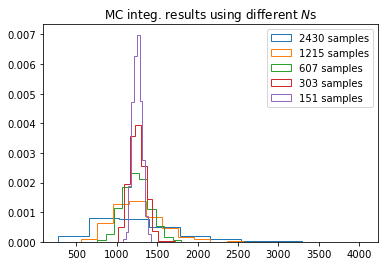

In [29]:
sample_n = 10 #number of samples per each run
results_ = 100 #runs for each N
runs_n = 5 #number of Ns

N_results = np.empty([runs_n, results_n])

for j in range(runs_n):
    sample_n = sample_n * 3
    for i in range(results_n):
        N_results[j][i] = MC_integration(sample_n, mean, sigma)

for i in range(runs_n):
    plt.hist(N_results[i], histtype = 'step', density= True, label = str(int(sample_n / np.power(2, i))) + " samples")
plt.legend()
plt.title("MC integ. results using different $N$s")